# Pymaceuticals Inc.
---

### Analysis

    The purpose of this study is to compare the performance of the drug Capomulin versus several Pymaceuticals’ drugs of interest against squamous cell carcinoma (SCC). In order to tests the efficacies of each drug, 249 mice who were identified with SCC tumors have received treatment from these drugs. The following analysis summarizes these results:
    
    According to the data given by the bar charts, Capomulin and Ramicane has the highest number of mice that has survived the treatment, whereas Propiva is shown to have the lowest number of mice survival. 

    Data given by the pie charts suggests that mice gender did not effect the efficacy of the drugs. This is proven by a fairly even distribution between both genders with males making up 51% of the population, compared to females making up 49%.
    
    According to data given by the box and whisker plot, results reveal that Ramicane actually has the lowest tumor volume count with a median of 36.56165229. The next lowest drug with the lowest tumor volume count is Capomulin with a median of 38.125164399999996. This indicates that Ramicane is shown to reduce SCC cancer cells effectively.
    
    Next, the line graph shows the correlation between the amount of tumor volume vs the amount of days Mice I509 has been treated with the Capomulin drug. We can see that as time passes, the amount of tumor cells present in Mice I509's body decreases. There are recurrences of the tumor cells coming back, but it does show a gradual decline over time.
    
    Lastly, the scatterplot shows a direct correlation between the amount of tumor volume cells vs the weight of a mouse. The heavier a mouse is, the more tumor cells it has.
    
    From the data, we can conclude that Capomulin has demonstrated strong improvements decreasing the amount of tumor cells in mice, however it is slightly less effective than Ramicane. We can conclude that both treatments are successful in treating SCC, but further testing should be done to see which of the two drugs is more effective.

In [117]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(study_results,mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [118]:
# Checking the number of mice.
mouse_count=len(mouse_data_complete["Mouse ID"].unique())
print(mouse_count)

249


In [119]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [120]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] == "g989", :]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [121]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_data_complete.loc[mouse_data_complete['Mouse ID'] !="g989"]
clean_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [122]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count=len(clean_mouse_data["Mouse ID"].unique())
clean_mouse_count

248

## Summary Statistics

In [123]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean=clean_mouse_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median=clean_mouse_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance=clean_mouse_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std=clean_mouse_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem=clean_mouse_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_clean_data=pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,"Tumor Volume Variance":variance,"Tumor Volume Std. Dev":std,"Tumor Volume Std. Err.":sem})
summary_clean_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [124]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_table = clean_mouse_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})
summary_table
# Using the aggregation method, produce the same summary statistics in a single line.


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

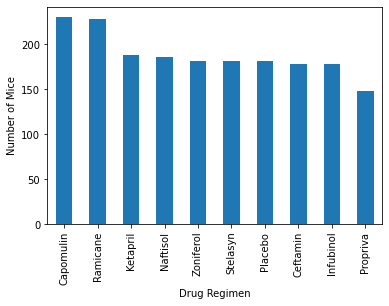

In [125]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts=clean_mouse_data["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

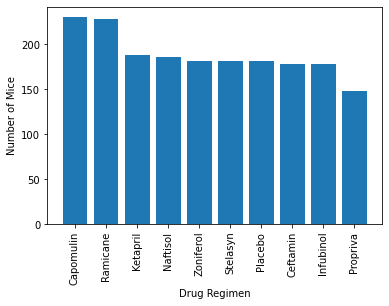

In [126]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.show()

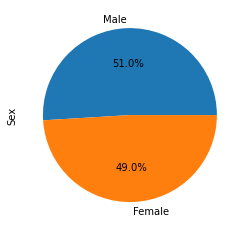

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = clean_mouse_data["Sex"].value_counts()
counts.plot(kind="pie",autopct="%1.1f%%")
plt.show()

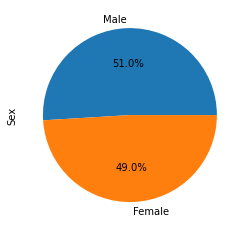

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts.values,labels=counts.index.values,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [129]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = clean_mouse_data[(clean_mouse_data["Drug Regimen"] == "Capomulin") |
                        (clean_mouse_data["Drug Regimen"] == "Ramicane")  |
                        (clean_mouse_data["Drug Regimen"] == "Infubinol") |
                        (clean_mouse_data["Drug Regimen"] == "Ceftamin")
                       ]
max_timepoint = timepoint_df.groupby("Mouse ID")["Timepoint"].max()
max_timepoint_df = pd.DataFrame(max_timepoint)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_drug = pd.merge(max_timepoint_df, clean_mouse_data, on=("Mouse ID","Timepoint"), how = 'left')
merge_drug_df = pd.DataFrame(merge_drug)
merge_drug_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [130]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles=merge_drug_df['Tumor Volume (mm3)'].quantile([.25,.50,.75])
lowerq=quartiles[.25]
upperq=quartiles[.75]
IQR=upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
capomulin = merge_drug_df.loc[merge_drug_df["Drug Regimen"] == "Capomulin",:]
capo = capomulin['Tumor Volume (mm3)']

ramicane = merge_drug_df.loc[merge_drug_df["Drug Regimen"] == "Ramicane",:]
rami = ramicane['Tumor Volume (mm3)']

infubinol = merge_drug_df.loc[merge_drug_df["Drug Regimen"] == "Infubinol",:]
infu = infubinol['Tumor Volume (mm3)']

ceftamin = merge_drug_df.loc[merge_drug_df["Drug Regimen"] == "Ceftamin",:]
ceft = ceftamin['Tumor Volume (mm3)']
    
    
    # add subset 
treatment_drugs=[capo,rami,infu,ceft]  

In [131]:
 # Determine outliers using upper and lower bounds
quartiles=capo.quantile([.25,.5,.75])
lowerq=quartiles[.25]
upperq=quartiles[.75]
IQR=upperq-lowerq

lowerbound=lowerq-(1.5*IQR)
upperbound=upperq+(1.5*IQR)

print(f"Lower quartile of Capomulin is {lowerq}.")
print(f"Upper quartile of Capomulin is {upperq}.")
print(f"Median of Capomulin is {quartiles[0.5]}.")
print(f"Interquartile range of Capomulin is {IQR}.")
print(f"Values below {lowerbound} could be outliers.")
print(f"Values above {upperbound} could be outliers.")

Lower quartile of Capomulin is 32.37735684.
Upper quartile of Capomulin is 40.1592203.
Median of Capomulin is 38.125164399999996.
Interquartile range of Capomulin is 7.781863460000004.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [132]:
quartiles=rami.quantile([.25,.5,.75])
lowerq=quartiles[.25]
upperq=quartiles[.75]
IQR=upperq-lowerq

lowerbound=lowerq-(1.5*IQR)
upperbound=upperq+(1.5*IQR)

print(f"Lower quartile of Ramicane is {lowerq}.")
print(f"Upper quartile of Ramicane is {upperq}.")
print(f"Median of Ramicane is {quartiles[0.5]}.")
print(f"Interquartile range of Ramicane is {IQR}.")
print(f"Values below {lowerbound} could be outliers.")
print(f"Values above {upperbound} could be outliers.")

Lower quartile of Ramicane is 31.56046955.
Upper quartile of Ramicane is 40.65900627.
Median of Ramicane is 36.56165229.
Interquartile range of Ramicane is 9.098536719999998.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [133]:
quartiles=infu.quantile([.25,.5,.75])
lowerq=quartiles[.25]
upperq=quartiles[.75]
IQR=upperq-lowerq

lowerbound=lowerq-(1.5*IQR)
upperbound=upperq+(1.5*IQR)

print(f"Lower quartile of Infubinol is {lowerq}.")
print(f"Upper quartile of Infubinol is {upperq}.")
print(f"Median of Infubinol is {quartiles[0.5]}.")
print(f"Interquartile range of Infubinol is {IQR}.")
print(f"Values below {lowerbound} could be outliers.")
print(f"Values above {upperbound} could be outliers.")

Lower quartile of Infubinol is 54.04860769.
Upper quartile of Infubinol is 65.52574285.
Median of Infubinol is 60.16518046.
Interquartile range of Infubinol is 11.477135160000003.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [134]:
quartiles=ceft.quantile([.25,.5,.75])
lowerq=quartiles[.25]
upperq=quartiles[.75]
IQR=upperq-lowerq

lowerbound=lowerq-(1.5*IQR)
upperbound=upperq+(1.5*IQR)

print(f"Lower quartile of Ceftamin is {lowerq}.")
print(f"Upper quartile of Ceftamin is {upperq}.")
print(f"Median of Ceftamin is {quartiles[0.5]}.")
print(f"Interquartile range of Ceftamin is {IQR}.")
print(f"Values below {lowerbound} could be outliers.")
print(f"Values above {upperbound} could be outliers.")

Lower quartile of Ceftamin is 48.72207785.
Upper quartile of Ceftamin is 64.29983003.
Median of Ceftamin is 59.85195552.
Interquartile range of Ceftamin is 15.577752179999997.
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


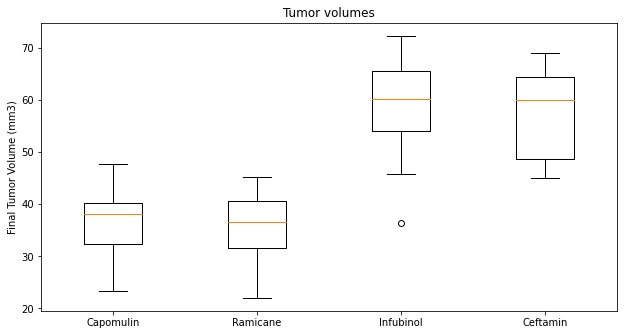

In [135]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig = plt.figure(figsize =(8, 4))
ax = fig.add_axes([0, 0, 1, 1])
plt.boxplot(treatment_drugs, labels=treatments,widths=0.4,vert=True) 
ax.set_title('Tumor volumes')
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

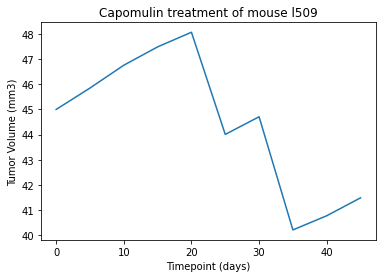

In [136]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_capomulin = clean_mouse_data.loc[clean_mouse_data['Mouse ID'] == 'l509']
plt.plot(mouse_capomulin['Timepoint'], mouse_capomulin['Tumor Volume (mm3)'])
# Add labels and title to plot
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

In [137]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
data_capomulin= clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin",:]
average_rename_volume = data_capomulin.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})

Average_tumor_volume =average_rename_volume.groupby(['Mouse ID']).mean()
Average_tumor_volume.head()

,Timepoint,Average Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


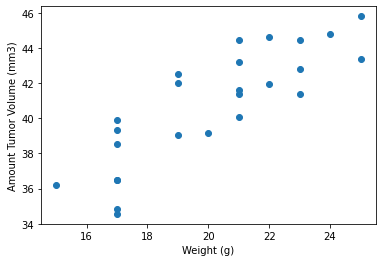

In [138]:
average_tumor_volume=Average_tumor_volume["Average Tumor Volume (mm3)"]
weight=Average_tumor_volume["Weight (g)"]
plt.scatter(weight,average_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Amount Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [139]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(weight,average_tumor_volume)[0],2)}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


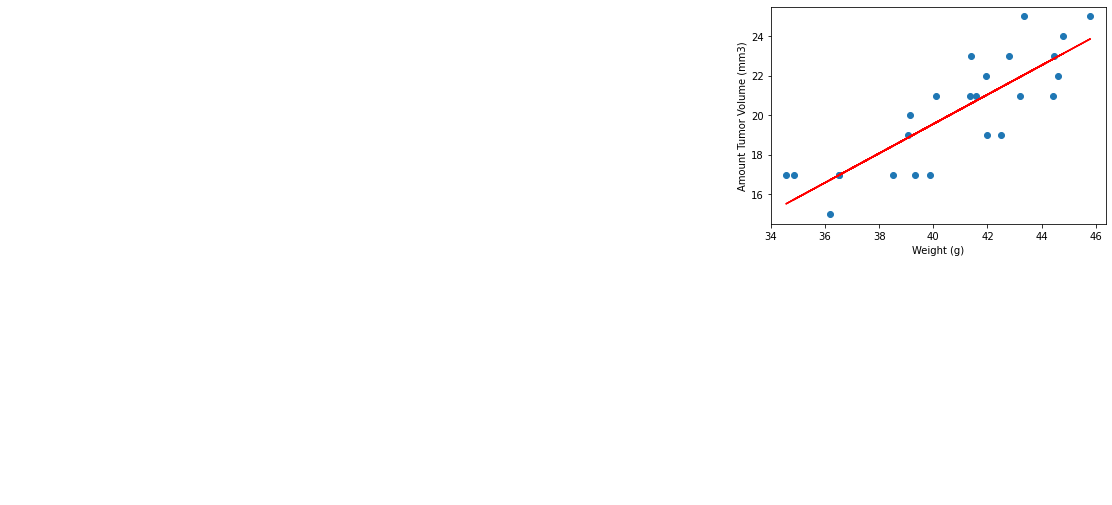

In [140]:
x_values = Average_tumor_volume["Average Tumor Volume (mm3)"]
y_values = Average_tumor_volume["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Amount Tumor Volume (mm3)")
plt.show()